In [10]:
data = read.table('./population-for-russia.csv', sep=',')
head(data)

V1,V2
1950,101936.8
1951,103506.9
1952,105385.1
1953,107302.8
1954,109208.9
1955,111125.5


In [22]:
as.double(unlist(data['V2']))

[1] 101936.8 103506.9 105385.1 107302.8 109208.9 111125.5 112859.3 114554.8
 [9] 116259.2 117956.9 119631.6 121324.3 122877.6 124276.5 125521.5 126541.3
[17] 127414.8 128183.9 128876.5 129572.6 130245.5 130977.4 131768.7 132556.2
[25] 133378.7 134293.4 135269.3 136263.7 137245.9 138163.7 139038.8 139900.0
[33] 140821.8 141861.7 142922.3 143938.0 144966.5 145958.9 146865.7 147351.7
[41] 147973.1 148298.7 148399.8 148390.2 148442.4 148490.3 148311.7 148067.4
[49] 147813.4 147352.2 146710.0 145990.3 145162.6 144307.9 143507.4 142775.6
[57] 142069.5 141377.8 140702.1 140041.2 139390.2

In [26]:
data['V2'] = as.double(unlist(data['V2']))

In [31]:
data['V1']

V1
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959


In [32]:
library('forecast')

In [42]:
model_arima <- forecast::auto.arima(data['V2'], seasonal = FALSE)

Получили, что лучшие параметры - 2, 2, 2
ТО есть 2 дифференцирования и p и q = 2

In [44]:
summary(model_arima)

Series: data["V2"] 
ARIMA(2,2,2)                    

Coefficients:
         ar1      ar2      ma1     ma2
      1.2592  -0.6773  -1.1161  0.8856
s.e.  0.1434   0.1701   0.1209  0.1379

sigma^2 estimated as 11606:  log likelihood=-357.76
AIC=725.51   AICc=726.65   BIC=735.9

Training set error measures:
                    ME     RMSE      MAE         MPE       MAPE       MASE
Training set -20.98444 102.2956 74.85312 -0.01512785 0.05642833 0.08067128
                    ACF1
Training set -0.09884148


In [62]:
nrow(data)

[1] 61

In [63]:
train <- head(data, 40)
test <- tail(data, 21)

In [66]:
model_arima <- forecast::auto.arima(train['V2'], seasonal = FALSE)

In [67]:
preds_arima <- forecast(model_arima, 21)

In [71]:
as.vector(test['V2'])

,V2
41,147973.1
42,148298.7
43,148399.8
44,148390.2
45,148442.4
46,148490.3
47,148311.7
48,148067.4
49,147813.4
50,147352.2


In [84]:
forecast::accuracy(preds_arima,(test[,'V2']))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-19.27982,95.57472,66.84511,-0.01476525,0.05372173,0.0574032,-0.1881495
Test set,4383.52068,4813.47324,4383.52068,3.04054551,3.04054551,3.7643458,NA


In [88]:
library('AnalyzeTS')

Loading required package: MASS
Loading required package: TSA
Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:forecast’:

    getResponse

This is mgcv 1.8-16. For overview type 'help("mgcv-package")'.
Loading required package: tseries

Attaching package: ‘TSA’

The following objects are masked from ‘package:forecast’:

    fitted.Arima, plot.Arima

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: TTR
Loading required package: urca

Attaching package: ‘AnalyzeTS’

The following object is masked from ‘package:base’:

    pmax



In [98]:
data.frame(test['V2'])

,V2
41,147973.1
42,148298.7
43,148399.8
44,148390.2
45,148442.4
46,148490.3
47,148311.7
48,148067.4
49,147813.4
50,147352.2


In [101]:
av.res(data.frame(test['V2']),data.frame(preds_arima))

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,min.model
ME,4383.520,1.414034e+04,-5373.294,1.930528e+04,-10538.240,Hi.95
MAE,4383.520,1.414034e+04,5608.989,1.930528e+04,10602.770,Point.Forecast
MPE,3.040,9.870000e+00,-3.789,1.348500e+01,-7.404,Hi.95
MAPE,3.040,9.870000e+00,3.948,1.348500e+01,7.448,Point.Forecast
MSE,23169524.626,2.944980e+08,66783113.313,5.656189e+08,217359057.174,Point.Forecast
RMSE,4813.473,1.716094e+04,8172.093,2.378274e+04,14743.102,Point.Forecast
U,8.783,3.131400e+01,14.912,4.339800e+01,26.902,Point.Forecast


А теперь воспольщуемся экспоненциальным сглаживанием

ETS(A,Ad,N) 

Call:
 ets(y = train[, "V2"]) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.9999 
    phi   = 0.9688 

  Initial states:
    l = 100080.1456 
    b = 1947.2427 

  sigma:  116.9773

     AIC     AICc      BIC 
540.5135 543.0590 550.6468 

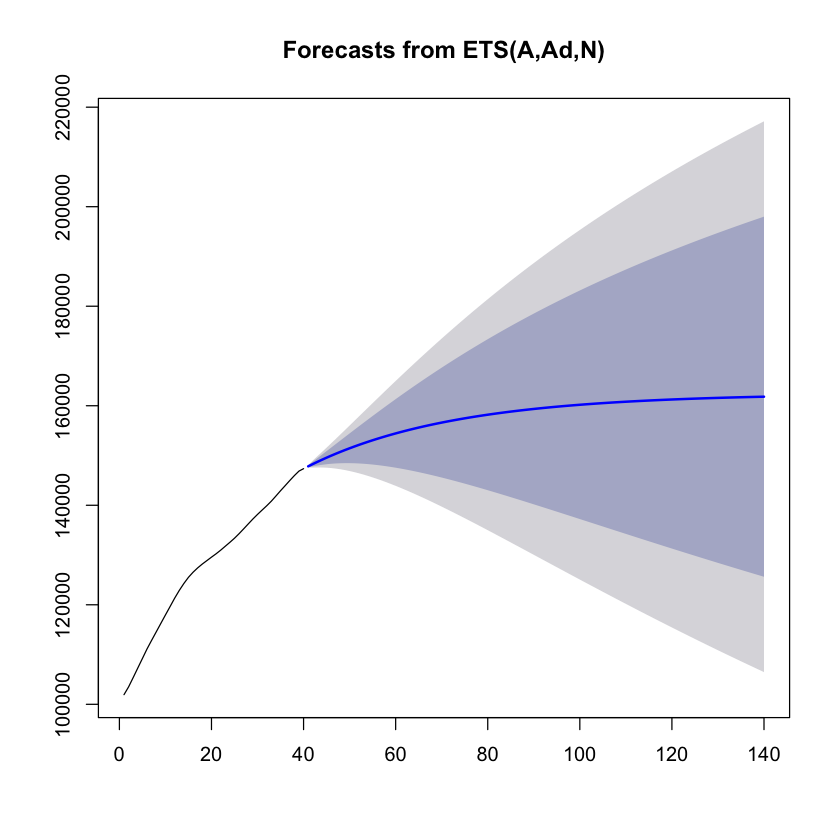

In [103]:
fitETS <- ets(train[,'V2'])
fitETS

plot(forecast(fitETS, h = 100))

Плохое разбиение на train и test, т.к дальше стало убывать

сдлеаем новое

In [105]:
train <- head(data, 50)
test <- tail(data, 11)

ETS(A,Ad,N) 

Call:
 ets(y = train[, "V2"]) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.9999 
    phi   = 0.9671 

  Initial states:
    l = 100079.585 
    b = 1945.9052 

  sigma:  127.2676

     AIC     AICc      BIC 
692.2303 694.1838 703.7025 

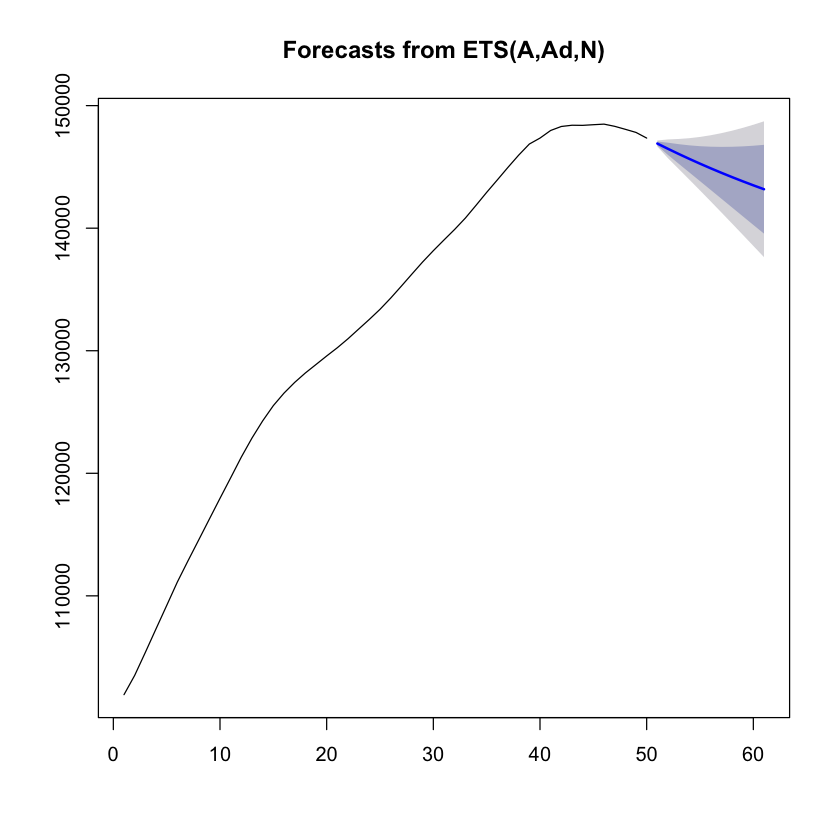

In [108]:
fitETS <- ets(train[,'V2'])
fitETS

plot(forecast(fitETS, h = 11))

Стало получше

In [110]:
frcstd_ets <- forecast(fitETS, h = 11)

In [111]:
av.res(data.frame(test[,'V2']), data.frame(frcstd_ets))

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,min.model
ME,-2036.550,-214.911,-3858.188,749.405,-4822.505,Hi.95
MAE,2036.550,217.840,3858.188,749.405,4822.505,Lo.80
MPE,-1.438,-0.151,-2.725,0.530,-3.407,Hi.95
MAPE,1.438,0.153,2.725,0.530,3.407,Lo.80
MSE,5480922.085,61230.898,19902657.778,836240.675,31181084.482,Lo.80
RMSE,2341.136,247.448,4461.239,914.461,5584.002,Lo.80
U,3.340,0.353,6.364,1.304,7.966,Lo.80


In [114]:
model_arima <- forecast::auto.arima(train['V2'], seasonal = FALSE)
preds_arima <- forecast(model_arima, 11)

In [115]:
av.res(data.frame(test['V2']),data.frame(preds_arima))

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,min.model
ME,-764.863,1723.167,-3252.893,3040.251,-4569.977,Hi.95
MAE,764.863,1723.167,3252.893,3040.251,4569.977,Point.Forecast
MPE,-0.538,1.223,-2.300,2.156,-3.233,Hi.95
MAPE,0.538,1.223,2.300,2.156,3.233,Point.Forecast
MSE,680931.886,5498675.234,14944940.056,15773313.472,30220128.831,Point.Forecast
RMSE,825.185,2344.925,3865.868,3971.563,5497.283,Point.Forecast
U,1.177,3.345,5.515,5.666,7.843,Point.Forecast


У модели АРИМА выходит очень плохо, возможно, просто очень плохие параметры были подбраны, ведь выборка всего из 50 элементов